In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
healthy_folder_path = '/content/drive/MyDrive/data/healthy'
schizophrenia_folder_path = '/content/drive/MyDrive/data/schizophrenia'

In [ ]:
def load_and_process_data(folder_path, label):
    data_frames = []
    filenames = os.listdir(folder_path)

    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        # Read the file skipping the first row (header)
        data_frame = pd.read_csv(file_path, header=0)

        # Assuming the first column contains electrode names, drop it
        data_frame = data_frame.drop(data_frame.columns[0], axis=1)

        data_frames.append(data_frame)

    # Combine all data frames into a single data frame
    combined_data = pd.concat(data_frames, ignore_index=True)

    # Add a column for the label (0 for healthy, 1 for schizophrenia)
    combined_data['label'] = label

    return combined_data

# Load and preprocess healthy and schizophrenia data
healthy_data = load_and_process_data(healthy_folder_path, label=0)
schizophrenia_data = load_and_process_data(schizophrenia_folder_path, label=1)

In [ ]:
df = pd.concat([healthy_data, schizophrenia_data], ignore_index=True)

In [ ]:
df

,F8,T4,T6,O2,Fp1,F7,T3,T5,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz,label
0,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
1,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
2,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
3,4.612154e-07,3.083103e-07,3.083103e-07,1.554051e-07,2.500000e-09,2.500000e-09,-1.504051e-07,-1.504051e-07,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,-1.504051e-07,-3.033103e-07,2.500000e-09,2.500000e-09,-3.033103e-07,0
4,4.612154e-07,4.612154e-07,3.083103e-07,1.554051e-07,2.500000e-09,2.500000e-09,-1.504051e-07,-1.504051e-07,-3.033103e-07,2.500000e-09,1.554051e-07,2.500000e-09,2.500000e-09,-1.504051e-07,-3.033103e-07,2.500000e-09,2.500000e-09,-1.504051e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2415996,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2415997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2415998,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1


In [ ]:
df=df.drop(['T6','T3','T5','C3','P3','Fz','Cz','Pz'], axis=1)

In [ ]:
df

,F8,T4,O2,Fp1,F7,O1,F4,C4,P4,F3,label
0,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
1,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
2,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
3,4.612154e-07,3.083103e-07,1.554051e-07,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,0
4,4.612154e-07,4.612154e-07,1.554051e-07,2.500000e-09,2.500000e-09,-3.033103e-07,2.500000e-09,1.554051e-07,2.500000e-09,2.500000e-09,0
...,...,...,...,...,...,...,...,...,...,...,...
2415995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2415996,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2415997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2415998,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1


In [ ]:
df.columns

Index(['F8', 'T4', 'O2', 'Fp1', 'F7', 'O1', 'F4', 'C4', 'P4', 'F3', 'label'], dtype='object')

In [ ]:
df.isnull().sum()

F8       0
T4       0
O2       0
Fp1      0
F7       0
O1       0
F4       0
C4       0
P4       0
F3       0
label    0
dtype: int64

In [ ]:
df.shape

(2416000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416000 entries, 0 to 2415999
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F8      float64
 1   T4      float64
 2   O2      float64
 3   Fp1     float64
 4   F7      float64
 5   O1      float64
 6   F4      float64
 7   C4      float64
 8   P4      float64
 9   F3      float64
 10  label   int64  
dtypes: float64(10), int64(1)
memory usage: 202.8 MB


In [ ]:
df.describe()

,F8,T4,O2,Fp1,F7,O1,F4,C4,P4,F3,label
count,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06,2.416000e+06
mean,3.509544e-09,4.213427e-09,6.633212e-09,-6.308998e-09,1.551826e-09,4.914976e-09,-2.728578e-09,8.767172e-10,5.983309e-09,-1.402414e-09,5.224545e-01
std,1.017476e-05,6.510175e-06,1.101982e-05,1.395151e-05,9.822934e-06,1.149608e-05,8.482238e-06,5.427930e-06,5.863994e-06,7.878978e-06,4.994956e-01
min,-4.003031e-04,-1.247681e-04,-1.602878e-04,-5.830070e-04,-3.073368e-04,-1.279791e-04,-4.613612e-04,-1.568888e-04,-1.296974e-04,-1.611822e-04,0.000000e+00
25%,-4.890464e-06,-3.221536e-06,-5.555556e-06,-5.189336e-06,-4.890464e-06,-5.726009e-06,-3.973033e-06,-2.863755e-06,-2.749792e-06,-4.125939e-06,0.000000e+00
50%,2.500000e-09,2.500000e-09,2.500000e-09,1.554051e-07,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,1.000000e+00
75%,4.895464e-06,3.218536e-06,5.507085e-06,5.507085e-06,5.048369e-06,5.555556e-06,4.130939e-06,2.907698e-06,2.754792e-06,4.283844e-06,1.000000e+00
max,3.377699e-04,3.331828e-04,3.422042e-04,3.428158e-04,3.110115e-04,3.301247e-04,6.879880e-04,3.360880e-04,3.177394e-04,3.250788e-04,1.000000e+00


In [ ]:
df.nunique()

F8       3791
T4       2423
O2       2615
Fp1      5824
F7       3385
O1       2196
F4       3372
C4       2011
P4       2426
F3       2553
label       2
dtype: int64

In [ ]:
df['label'].value_counts()

label
1    1262250
0    1153750
Name: count, dtype: int64

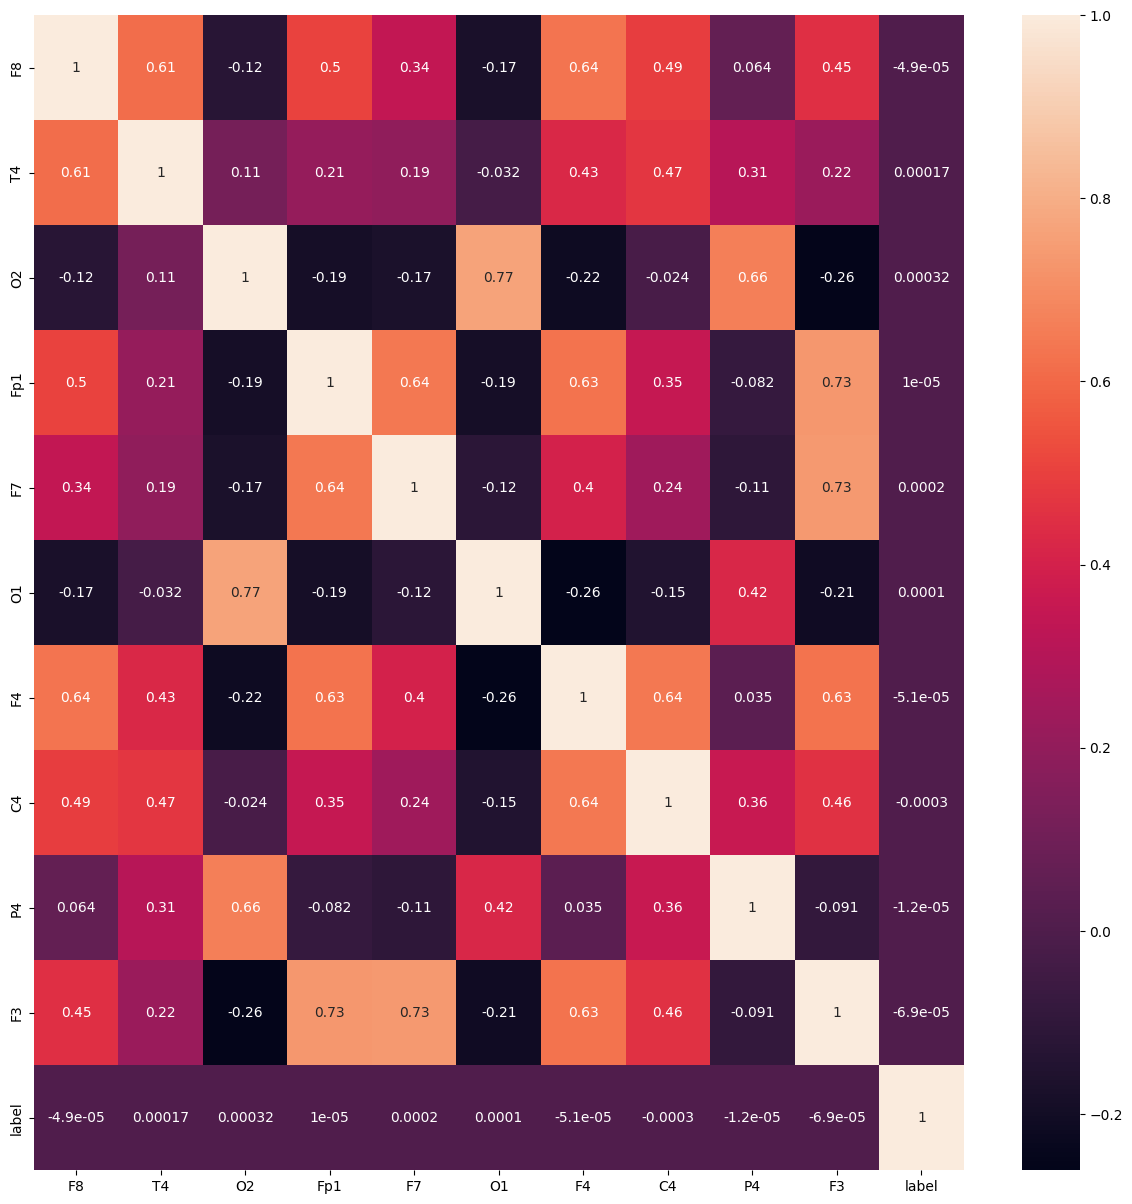

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: >

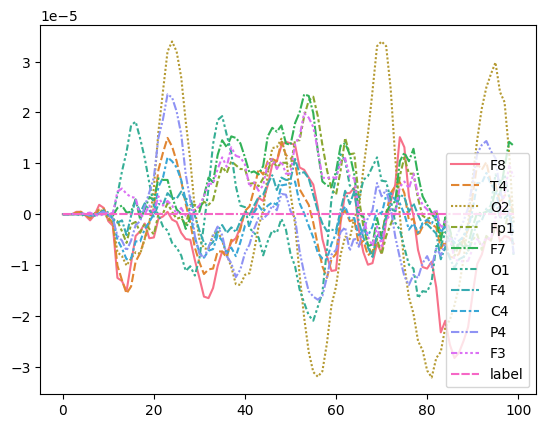

In [ ]:
sns.lineplot(data=df.head(100))

In [ ]:
X = df.drop(['label'], axis=1)
Y = df['label']

In [ ]:
X

,F8,T4,O2,Fp1,F7,O1,F4,C4,P4,F3
0,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
1,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
2,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
3,4.612154e-07,3.083103e-07,1.554051e-07,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
4,4.612154e-07,4.612154e-07,1.554051e-07,2.500000e-09,2.500000e-09,-3.033103e-07,2.500000e-09,1.554051e-07,2.500000e-09,2.500000e-09
...,...,...,...,...,...,...,...,...,...,...
2415995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2415996,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2415997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2415998,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1932800, 10) (483200, 10) (1932800,) (483200,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [ ]:
print('Accuracy:',DecisionTree.score(X_train,Y_train))

Accuracy: 0.6253331953642384


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train,Y_train)
print('Accuracy:',classifier.score(X_train,Y_train))

Accuracy: 0.9873649627483444


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)
print('Accuracy:',NB.score(X_train,Y_train))

Accuracy: 0.615207988410596


In [ ]:
import pickle
RF_filename = 'RF.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_filename, 'wb')
pickle.dump(classifier, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()